# Projeto Final - Análise e Visualização de Dados

ALuno: Ismael

### Step 1. Importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Importar os dados deste [endereço](http://dados.recife.pe.gov.br/dataset/61545107-2e7d-4506-b9fa-f5264a7f6ec9/resource/d153f88e-3c25-422b-8b94-ef8d660bf7bf/download/acidentes-2016.csv)

In [ ]:
link = "http://dados.recife.pe.gov.br/dataset/61545107-2e7d-4506-b9fa-f5264a7f6ec9/resource/d153f88e-3c25-422b-8b94-ef8d660bf7bf/download/acidentes-2016.csv"

### Step 3. Atribua o csv a variável acidentes

In [ ]:
df_acidentes = pd.read_csv(link, sep=";")
df_acidentes.head()

,longitude,latitude,data de abertura,hora de abertura,bairro,endereco,complemento,tipo de ocorrencia,quantidade de vitimas,descricao,tipo
0,-34.905705,-8.037728,01/01/2016,18:30,JAQUEIRA,AV RUI BARBOSA,EM FRENTE AO PARQUE DA JAQUEIRA,COLISÃO,1,COLISÃO ENTRE QUATRO AUTO; SEGUINTE DE UM CAPO...,Automóveis
1,-34.938068,-8.131177,04/01/2016,16:05,JORDÃO,RUADRALVAROFERRAZ,TERMINALDOÔNIBUSDEJORDÃOBAIXO,COLISÃO,1,2AUTOS,Automóveis
2,-34.915617,-7.993612,06/01/2016,17:33,DOISUNIDOS,RUAVINTEEUMDEJUNHO343,PRÓXIMOAASSEMBLÉIADEDEUSEANTENADAOI,CHOQUE,1,CHOQUEDEVEÍCULOCOMMURO,Automóveis
3,-34.896884,-8.118186,07/01/2016,10:29,BOAVIAGEM,AVENGENHEIRODOMINGOSFERREIRA3333,EMFRENTEAGALERIASANTAROSA,COLISÃO,1,COLISÃOCOMVITIMA;ONIBUSEAUTO-PASSEIO,Automóveis
4,-34.910203,-8.098421,07/01/2016,13:53,IMBIRIBEIRA,AVMARECHALMASCARENHASDEMORAES,EMBAIXODOSEMAFORO288,COLISÃO,1,COLISAODEMOTOEDOISAUTOS/V,Automóveis


### Step 4. Extraia a proporção dos acidentes em relação ao tipo de ocorrência

In [ ]:
proporcao = df_acidentes['tipo de ocorrencia'].value_counts(normalize=True)*100
print(proporcao)

COLISÃO                   79.119086
ATROPELAMENTO             11.990212
COLISÃO COM CICLISTA       3.425775
CHOQUE                     2.773246
COLISÃOa                   0.652529
CAPOTAMENTO                0.407830
ENTRADA E SAÍDA            0.326264
ENGAVETAMENTO              0.326264
TOMBAMENTO                 0.326264
ACID. DE PERCURSO          0.163132
COLISÃO\t2016 13 050\t     0.163132
ATROPELAMENTO ANIMAL       0.081566
QUEDA DE ÁRVORE            0.081566
ATROPELAMENTOa             0.081566
FISCALIZAÇÃO               0.081566
Name: tipo de ocorrencia, dtype: float64


### Step 5. Observe que há tipo de ocorrências que estão escritas erradas. Utilize str.replace() para agrupar os valores do mesmo tipo que podem estar com erro na escrita. No fim, serão 12 tipos de ocorrências.

In [ ]:

# Substitua as variações dos rótulos pelo rótulo padrão
df_acidentes['tipo de ocorrencia'] = df_acidentes['tipo de ocorrencia'].str.replace("COLISÃO\t2016 13 050\t", "COLISÃO")
df_acidentes['tipo de ocorrencia'] = df_acidentes['tipo de ocorrencia'].str.replace("COLISÃOa", "COLISÃO")
df_acidentes['tipo de ocorrencia'] = df_acidentes['tipo de ocorrencia'].str.replace("ATROPELAMENTOa", "ATROPELAMENTO")

# Obtenha os valores únicos ordenados
valores_unicos = df_acidentes["tipo de ocorrencia"].dropna().unique()

print("TOTAL", len(valores_unicos))
valores_unicos


TOTAL 12


array(['COLISÃO', 'CHOQUE', 'COLISÃO COM CICLISTA', 'ATROPELAMENTO',
       'CAPOTAMENTO', 'ATROPELAMENTO ANIMAL', 'ENTRADA E SAÍDA',
       'ENGAVETAMENTO', 'ACID. DE PERCURSO', 'QUEDA DE ÁRVORE',
       'TOMBAMENTO', 'FISCALIZAÇÃO'], dtype=object)

### Step 6. Apresente um gráfico de barras contendo as informações da  proporção dos acidentes em relação ao tipo de ocorrência (após tratamento)

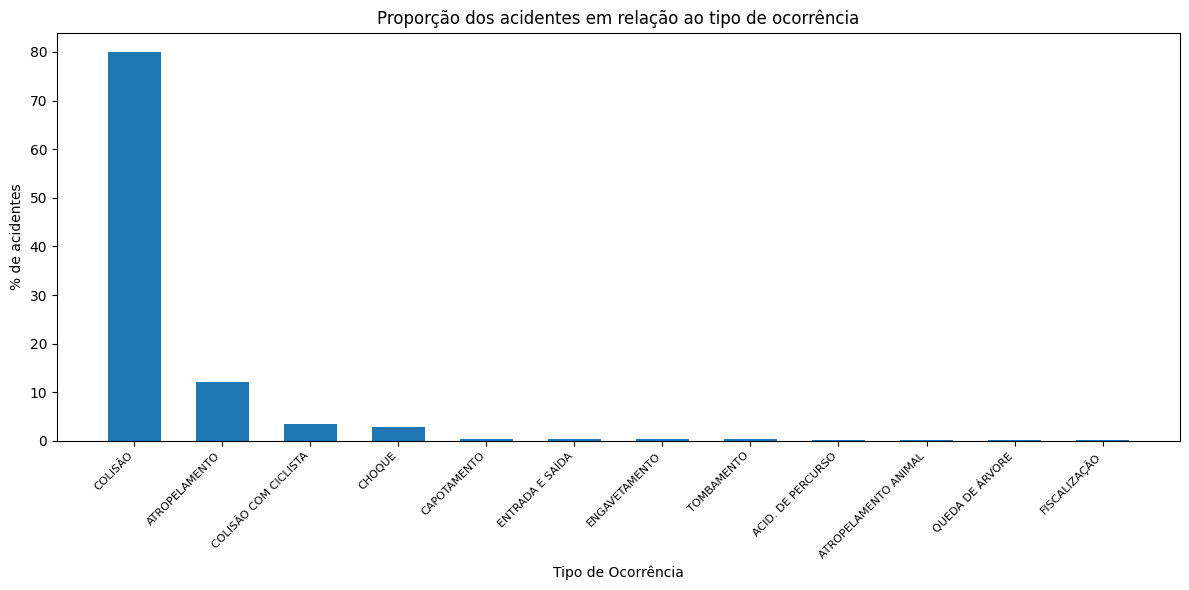

In [ ]:
x=df_acidentes['tipo de ocorrencia'].value_counts(normalize=True).index
y=df_acidentes['tipo de ocorrencia'].value_counts(normalize=True).values*100

plt.figure(figsize=(12,6))

plt.bar(x,y, width=0.6)
plt.xticks(rotation=45, ha='right', fontsize=8)


plt.title("Proporção dos acidentes em relação ao tipo de ocorrência")
plt.xlabel("Tipo de Ocorrência")
plt.ylabel("% de acidentes")

plt.tight_layout()
plt.show()



### Step 7. Apresente um gráfico de pizza que mostre a porcentagem da proporção de acidentes por tipo de ocorrência apenas para os tipos de ocorrência que se repetiram 30 vezes ou mais. Na legenda deve estar o tipo de ocorrência. (Não se preocupar com textos sobrescritos)

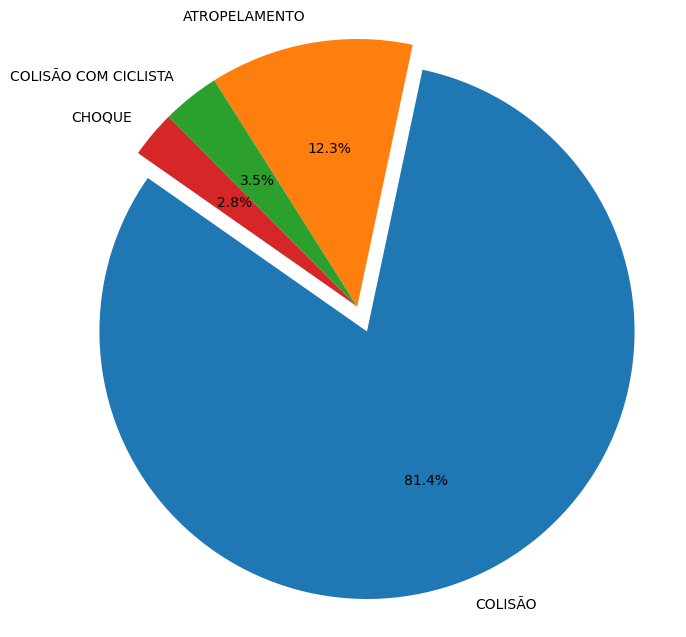

In [ ]:
tipo_ocorrencia = df_acidentes['tipo de ocorrencia'].value_counts()
contagem_filtrada = tipo_ocorrencia[tipo_ocorrencia >= 30]


tupla_tamanho = (0,) * (contagem_filtrada.value_counts().values.size - 1)
explode = (0.1, ) + tupla_tamanho
plt.figure(figsize=(8,8))


plt.pie(contagem_filtrada.values, labels=contagem_filtrada.index, autopct='%1.1f%%', explode=explode, startangle=145)
plt.axis('equal')
plt.show()


### Step 8. Apresente a distribuição da quantidade de vítimas analisando o tipo de veículo.
Antes disso, atenção: alguns valores podem estar errados tanto na coluna de vítimas quanto na coluna de tipos de veículo. Agrupe os valores do mesmo tipo de veículo, resultando em 6 tipos. Na coluna de vítimas, altere os valores que foram preenchidos errados por 0 (zero). Observe se as colunas estão preenchidas com as variáveis do tipo correto. (Para mudar o tipo de dados de uma coluna usa .astype())


In [ ]:
df_acidentes['tipo'] = df_acidentes['tipo'].str.replace("Automoveis", "Automóvel")
df_acidentes['tipo'] = df_acidentes['tipo'].str.replace("Automóveis", "Automóvel")

df_acidentes['quantidade de vitimas'].fillna("0", inplace=True)


quantidade_de_vitimas = df_acidentes['tipo'].value_counts()

print(quantidade_de_vitimas)

Motocicleta    800
Automóvel      174
Pedestre       143
Ciclista        56
Outros          30
Ciclomotor      28
Name: tipo, dtype: int64


### Step 9. Encontrado o tipo de veículo com o maior número de vítimas, apresente um gráfico de barras horizontal que mostre os TOP 5 bairros em que aconteceram acidentes com esse tipo de veículo

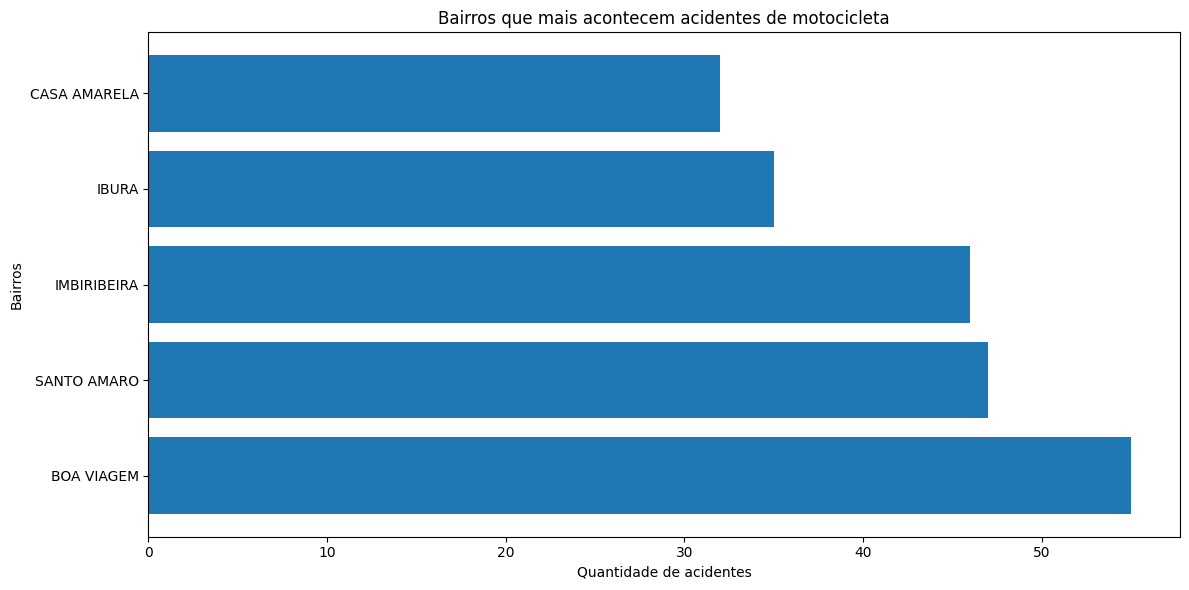

In [ ]:
bairros_acidentes = df_acidentes[df_acidentes['tipo'] == 'Motocicleta'].groupby('bairro').size().sort_values(ascending=False).head()

plt.figure(figsize=(12,6))
plt.barh(bairros_acidentes.index, bairros_acidentes.values)

plt.title("Bairros que mais acontecem acidentes de motocicleta")
plt.xlabel("Quantidade de acidentes")
plt.ylabel("Bairros")
plt.tight_layout()
plt.show()

### Step 10. Em qual mês teve mais vítimas? Quantas vítimas?
Atenção: Use pd.to_datetime para transformar uma coluna em formato data e use dt.month_name() para extrair o mês dessa coluna. É permitido criar novas colunas no dataframe.


In [ ]:
# Transformar a coluna 'data de abertura' em formato de data
df_acidentes['data de abertura'] = pd.to_datetime(df_acidentes['data de abertura'])

# Extrair o mês da data de abertura e criar uma nova coluna 'mes' (nome completo do mês)
df_acidentes['mes'] = df_acidentes['data de abertura'].dt.strftime('%B')

# Converter a coluna 'quantidade de vitimas' para o tipo numérico
df_acidentes['quantidade de vitimas'] = pd.to_numeric(df_acidentes['quantidade de vitimas'], errors='coerce')

# Contar o número total de vítimas em cada mês
total_vitimas_por_mes = df_acidentes.groupby('mes')['quantidade de vitimas'].sum()

# Ordenar em ordem decrescente
total_vitimas_por_mes = total_vitimas_por_mes.sort_values(ascending=False)

# Imprimir a saída exatamente como você descreveu
total_vitimas_por_mes.index.name = 'mes'
print(total_vitimas_por_mes.head(5))


mes
July        197.0
June        180.0
April       173.0
January     161.0
February    160.0
Name: quantidade de vitimas, dtype: float64


### Step 11. Insira um gráfico de dispersão que apresente no eixo x os meses e no eixo y o número de vítimas

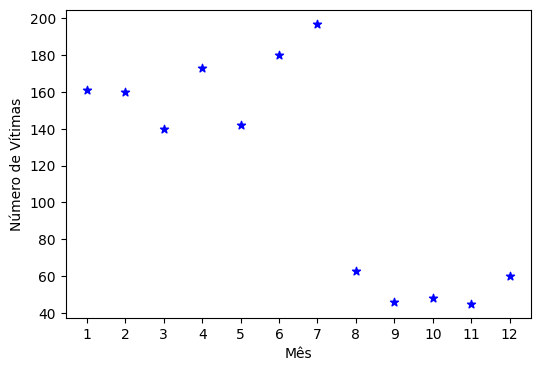

In [ ]:
# Transformar a coluna 'data de abertura' em formato de data
df_acidentes['data de abertura'] = pd.to_datetime(df_acidentes['data de abertura'])

# Extrair o mês da data de abertura e criar uma nova coluna 'mes' (número do mês)
df_acidentes['mes'] = df_acidentes['data de abertura'].dt.month

# Converter a coluna 'quantidade de vitimas' para o tipo numérico
df_acidentes['quantidade de vitimas'] = pd.to_numeric(df_acidentes['quantidade de vitimas'], errors='coerce')

# Contar o número total de vítimas em cada mês
total_vitimas_por_mes = df_acidentes.groupby('mes')['quantidade de vitimas'].sum()

# Ordenar em ordem decrescente
total_vitimas_por_mes = total_vitimas_por_mes.sort_values(ascending=False)

# Criar um gráfico de dispersão
plt.figure(figsize=(6, 4))
plt.scatter(total_vitimas_por_mes.index, total_vitimas_por_mes, marker="*", color="b")
plt.xlabel("Mês")
plt.ylabel("Número de Vítimas")

# Definir a escala no eixo y entre 40 e 200 com intervalos de 20
plt.yticks(range(40, 201, 20))

plt.xticks(range(1, 13))
#plt.grid(True)
plt.show()


### Step 12. Crie seu enunciado e seu gráfico.
Atenção: Deve ter manipulação de dados e plotagem de gráfico

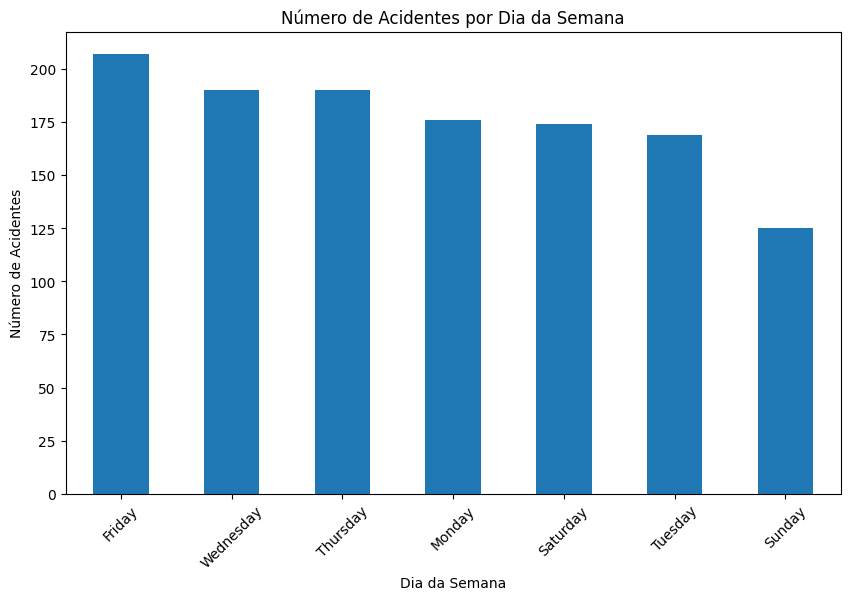

In [ ]:
# Extrair o dia da semana da data de abertura
df_acidentes['dia_da_semana'] = df_acidentes['data de abertura'].dt.day_name()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
dia_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_acidentes['dia_da_semana'] = pd.Categorical(df_acidentes['dia_da_semana'], categories=dia_ordem, ordered=True)
df_acidentes['dia_da_semana'].value_counts().plot(kind='bar')
plt.title("Número de Acidentes por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Acidentes")
plt.xticks(rotation=45)
plt.show()
